In [1]:
from basketball_reference_web_scraper import client
import pickle
import pandas as pd
from decimal import Decimal, ROUND_HALF_UP
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
shot_efficiency_stats_df = pd.DataFrame(columns=["name", "attempted_field_goals", "eFG%", "TS%"])

In [3]:
stats_2016 = client.players_season_totals(season_end_year=2016)
advanced_stats_2016 = client.players_advanced_season_totals(season_end_year=2016)

In [4]:
stats_2016

[{'slug': 'acyqu01',
  'name': 'Quincy Acy',
  'positions': [<Position.POWER_FORWARD: 'POWER FORWARD'>],
  'age': 25,
  'team': <Team.SACRAMENTO_KINGS: 'SACRAMENTO KINGS'>,
  'games_played': 59,
  'games_started': 29,
  'minutes_played': 876,
  'made_field_goals': 119,
  'attempted_field_goals': 214,
  'made_three_point_field_goals': 19,
  'attempted_three_point_field_goals': 49,
  'made_free_throws': 50,
  'attempted_free_throws': 68,
  'offensive_rebounds': 65,
  'defensive_rebounds': 123,
  'assists': 27,
  'steals': 29,
  'blocks': 24,
  'turnovers': 27,
  'personal_fouls': 103,
  'points': 307},
 {'slug': 'adamsjo01',
  'name': 'Jordan Adams',
  'positions': [<Position.SHOOTING_GUARD: 'SHOOTING GUARD'>],
  'age': 21,
  'team': <Team.MEMPHIS_GRIZZLIES: 'MEMPHIS GRIZZLIES'>,
  'games_played': 2,
  'games_started': 0,
  'minutes_played': 15,
  'made_field_goals': 2,
  'attempted_field_goals': 6,
  'made_three_point_field_goals': 0,
  'attempted_three_point_field_goals': 1,
  'made_fr

In [5]:
name_list = []
for i, player_stats_2016 in enumerate(stats_2016):
    print(i, player_stats_2016["name"])
    name_list.append(player_stats_2016["name"])
    shot_efficiency_stats_df.loc[i, "name"] = player_stats_2016["name"]
    shot_efficiency_stats_df.loc[i, "attempted_field_goals"] = player_stats_2016["attempted_field_goals"]
    if shot_efficiency_stats_df.loc[i, "attempted_field_goals"] == 0:
        continue
    eFG = (player_stats_2016["made_field_goals"]+0.5*player_stats_2016["made_three_point_field_goals"])/player_stats_2016["attempted_field_goals"]*100
    shot_efficiency_stats_df.loc[i, "eFG%"] = Decimal(str(eFG)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
shot_efficiency_stats_df.index = name_list

0 Quincy Acy
1 Jordan Adams
2 Steven Adams
3 Arron Afflalo
4 Alexis Ajinça
5 Cole Aldrich
6 LaMarcus Aldridge
7 Cliff Alexander
8 Lavoy Allen
9 Tony Allen
10 Al-Farouq Aminu
11 Lou Amundson
12 Chris Andersen
13 Chris Andersen
14 Alan Anderson
15 James Anderson
16 Justin Anderson
17 Kyle Anderson
18 Ryan Anderson
19 Giannis Antetokounmpo
20 Thanasis Antetokounmpo
21 Carmelo Anthony
22 Joel Anthony
23 Keith Appling
24 Trevor Ariza
25 Darrell Arthur
26 Ömer Aşık
27 D.J. Augustin
28 D.J. Augustin
29 Jeff Ayres
30 Luke Babbitt
31 Cameron Bairstow
32 Leandro Barbosa
33 J.J. Barea
34 Andrea Bargnani
35 Harrison Barnes
36 Matt Barnes
37 Will Barton
38 Brandon Bass
39 Nicolas Batum
40 Jerryd Bayless
41 Aron Baynes
42 Kent Bazemore
43 Bradley Beal
44 Michael Beasley
45 Marco Belinelli
46 Anthony Bennett
47 Patrick Beverley
48 Bismack Biyombo
49 Nemanja Bjelica
50 Tarik Black
51 DeJuan Blair
52 Steve Blake
53 Eric Bledsoe
54 Bojan Bogdanović
55 Andrew Bogut
56 Matt Bonner
57 Devin Booker
58 Trevo

In [6]:
shot_efficiency_stats_df

,name,attempted_field_goals,eFG%,TS%
Quincy Acy,Quincy Acy,214,60.0,NaN
Jordan Adams,Jordan Adams,6,33.3,NaN
Steven Adams,Steven Adams,426,61.3,NaN
Arron Afflalo,Arron Afflalo,799,50.0,NaN
Alexis Ajinça,Alexis Ajinça,315,47.6,NaN
...,...,...,...,...
Joe Young,Joe Young,169,39.6,NaN
Nick Young,Nick Young,372,44.2,NaN
Thaddeus Young,Thaddeus Young,963,51.8,NaN
Cody Zeller,Cody Zeller,437,53.0,NaN


In [7]:
for i, player_advanced_stats_2016 in enumerate(advanced_stats_2016):
    shot_efficiency_stats_df.iloc[i, 3]  = player_advanced_stats_2016["true_shooting_percentage"]*100

In [8]:
transferred_player = shot_efficiency_stats_df[shot_efficiency_stats_df.duplicated('name', keep='first')]
transferred_player

,name,attempted_field_goals,eFG%,TS%
Chris Andersen,Chris Andersen,62,56.5,60.5
D.J. Augustin,D.J. Augustin,229,54.1,60.1
Chase Budinger,Chase Budinger,45,55.6,56.7
Mario Chalmers,Mario Chalmers,412,47.2,57.0
Bryce Cotton,Bryce Cotton,2,100.0,100.0
Jared Cunningham,Jared Cunningham,14,35.7,46.8
James Ennis III,James Ennis III,13,38.5,46.0
James Ennis III,James Ennis III,100,62.0,64.7
Randy Foye,Randy Foye,149,43.3,46.9
Tim Frazier,Tim Frazier,169,48.8,53.9


In [9]:
shot_efficiency_stats_unique_df = shot_efficiency_stats_df.drop_duplicates(subset='name', keep='first')
shot_efficiency_stats_unique_df

,name,attempted_field_goals,eFG%,TS%
Quincy Acy,Quincy Acy,214,60.0,62.9
Jordan Adams,Jordan Adams,6,33.3,42.7
Steven Adams,Steven Adams,426,61.3,62.1
Arron Afflalo,Arron Afflalo,799,50.0,53.1
Alexis Ajinça,Alexis Ajinça,315,47.6,51.4
...,...,...,...,...
Joe Young,Joe Young,169,39.6,42.8
Nick Young,Nick Young,372,44.2,48.3
Thaddeus Young,Thaddeus Young,963,51.8,53.3
Cody Zeller,Cody Zeller,437,53.0,59.2


In [10]:
shot_efficiency_stats_unique_df.loc['Chris Andersen', ['eFG%', 'TS%']] = [55.6, 59.8]
shot_efficiency_stats_unique_df.loc['D.J. Augustin', ['eFG%', 'TS%']] = [52.0, 57.5]
shot_efficiency_stats_unique_df.loc['Chase Budinger', ['eFG%', 'TS%']] = [48.5, 51.4]
shot_efficiency_stats_unique_df.loc['Mario Chalmers', ['eFG%', 'TS%']] = [46.2, 56.1]
shot_efficiency_stats_unique_df.loc['Bryce Cotton', ['eFG%', 'TS%']] = [40.0, 40.0]
shot_efficiency_stats_unique_df.loc['Jared Cunningham', ['eFG%', 'TS%']] = [40.0, 46.4]
shot_efficiency_stats_unique_df.loc['James EnnisIII', ['eFG%', 'TS%']] = [59.3, 62.1]
shot_efficiency_stats_unique_df.loc['Randy Foye', ['eFG%', 'TS%']] = [42.8, 46.1]
shot_efficiency_stats_unique_df.loc['Tim Frazier', ['eFG%', 'TS%']] = [45.4, 49.9]
shot_efficiency_stats_unique_df.loc['Jimmer Fredette', ['eFG%', 'TS%']] = [50.0, 62.5]
shot_efficiency_stats_unique_df.loc['Channing Frye', ['eFG%', 'TS%']] = [56.9, 58.6]
shot_efficiency_stats_unique_df.loc['Erick Green', ['eFG%', 'TS%']] = [42.3, 46.8]
shot_efficiency_stats_unique_df.loc['Jeff Green', ['eFG%', 'TS%']] = [47.0, 51.0]
shot_efficiency_stats_unique_df.loc['P.J. Hairston', ['eFG%', 'TS%']] = [44.1, 47.0]
shot_efficiency_stats_unique_df.loc['Tobias Harris', ['eFG%', 'TS%']] = [51.4, 56.0]
shot_efficiency_stats_unique_df.loc['Justin Holiday', ['eFG%', 'TS%']] = [46.5, 48.9]
shot_efficiency_stats_unique_df.loc['Ryan Hollins', ['eFG%', 'TS%']] = [62.0, 63.6]
shot_efficiency_stats_unique_df.loc['Kris Humphries', ['eFG%', 'TS%']] = [46.8, 51.7] 
shot_efficiency_stats_unique_df.loc['Ersan İlyasova', ['eFG%', 'TS%']] = [49.6, 52.6]
shot_efficiency_stats_unique_df.loc['John Jenkins', ['eFG%', 'TS%']] = [49.4, 52.2]
shot_efficiency_stats_unique_df.loc['Brandon Jennings', ['eFG%', 'TS%']] = [45.2, 49.1] 
shot_efficiency_stats_unique_df.loc['Joe Johnson', ['eFG%', 'TS%']] = [50.9, 53.8] 
shot_efficiency_stats_unique_df.loc['Orlando Johnson', ['eFG%', 'TS%']] = [29.4, 34.6] 
shot_efficiency_stats_unique_df.loc['Sean Kilpatrick', ['eFG%', 'TS%']] = [52.8, 57.6] 
shot_efficiency_stats_unique_df.loc['Ty Lawson', ['eFG%', 'TS%']] = [44.4, 47.6] 
shot_efficiency_stats_unique_df.loc['Courtney Lee', ['eFG%', 'TS%']] = [51.8, 55.1] 
shot_efficiency_stats_unique_df.loc['David Lee', ['eFG%', 'TS%']] = [53.1, 56.8] 
shot_efficiency_stats_unique_df.loc['Shelvin Mack', ['eFG%', 'TS%']] = [48.6, 50.7]
shot_efficiency_stats_unique_df.loc['Kevin Martin', ['eFG%', 'TS%']] = [43.1, 52.0]
shot_efficiency_stats_unique_df.loc['Ray McCallum', ['eFG%', 'TS%']] = [42.8, 44.9]
shot_efficiency_stats_unique_df.loc['Jordan McRae', ['eFG%', 'TS%']] = [50.0, 54.8]
shot_efficiency_stats_unique_df.loc['Andre Miller', ['eFG%', 'TS%']] = [56.6, 60.0]
shot_efficiency_stats_unique_df.loc['Markieff Morris', ['eFG%', 'TS%']] = [45.8, 48.9]
shot_efficiency_stats_unique_df.loc['Steve Novak', ['eFG%', 'TS%']] = [63.9, 65.1]
shot_efficiency_stats_unique_df.loc['Phil Pressey', ['eFG%', 'TS%']] = [41.0, 43.3]
shot_efficiency_stats_unique_df.loc['Brian Roberts', ['eFG%', 'TS%']] = [49.4, 55.2]
shot_efficiency_stats_unique_df.loc['JaKarr Sampson', ['eFG%', 'TS%']] = [46.4, 50.4]
shot_efficiency_stats_unique_df.loc['Ish Smith', ['eFG%', 'TS%']] = [44.0, 46.5]
shot_efficiency_stats_unique_df.loc['Josh Smith', ['eFG%', 'TS%']] = [42.3, 43.9]
shot_efficiency_stats_unique_df.loc['Lance Stephenson', ['eFG%', 'TS%']] = [51.3, 54.8]
shot_efficiency_stats_unique_df.loc['Alex Stepheson', ['eFG%', 'TS%']] = [33.3, 34.1]
shot_efficiency_stats_unique_df.loc['Jarnell Stokes', ['eFG%', 'TS%']] = [60.0, 59.5]
shot_efficiency_stats_unique_df.loc['Jason Thompson', ['eFG%', 'TS%']] = [50.5, 55.8]
shot_efficiency_stats_unique_df.loc['Marcus Thornton', ['eFG%', 'TS%']] = [48.2, 51.1]
shot_efficiency_stats_unique_df.loc['Beno Udrih', ['eFG%', 'TS%']] = [47.2, 49.6]
shot_efficiency_stats_unique_df.loc['Anderson Varejão', ['eFG%', 'TS%']] = [42.7, 47.3]
shot_efficiency_stats_unique_df.loc['Briante Weber', ['eFG%', 'TS%']] = [35.9, 38.0]
shot_efficiency_stats_unique_df.loc['Sonny Weems', ['eFG%', 'TS%']] = [45.0, 45.9]

/tmp/ipykernel_1943898/2297339140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_efficiency_stats_unique_df.loc['Chris Andersen', ['eFG%', 'TS%']] = [55.6, 59.8]
/tmp/ipykernel_1943898/2297339140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_efficiency_stats_unique_df.loc['D.J. Augustin', ['eFG%', 'TS%']] = [52.0, 57.5]
/tmp/ipykernel_1943898/2297339140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_effic

In [11]:
with open('../pickle_files/clustering1.pkl', 'rb') as f:
    clustering_result = pickle.load(f)
    player_cluster_dict = pickle.load(f)
    players_grouped_by_cluster_dict = pickle.load(f)

In [12]:
players_grouped_by_cluster_dict[13]

['Frank Kaminsky',
 'Chris Bosh',
 'Kristaps Porzingis',
 'Carmelo Anthony',
 'Lance Thomas',
 'Arron Afflalo',
 'Bobby Portis',
 'Derrick Williams',
 'Aaron Gordon',
 'Kelly Olynyk',
 'Draymond Green',
 'Marcus Morris',
 'Kawhi Leonard',
 'Jeff Green',
 'Andrew Wiggins',
 'Shabazz Muhammad',
 'Ryan Anderson',
 'Kevin Love',
 'T.J. Warren',
 'Rudy Gay',
 'Jon Leuer',
 'Harrison Barnes',
 'Spencer Hawes',
 'Gerald Henderson',
 'Mike Scott']

In [13]:
players_grouped_by_cluster_dict[6].remove('Greivis Vasquez')
if "Greivis Vásquez" in name_list:
    print(True)
    players_grouped_by_cluster_dict[6].append("Greivis Vásquez")

True


In [14]:
players_grouped_by_cluster_dict[5].remove('Manu Ginobili')
if "Manu Ginóbili" in name_list:
    print(True)
    players_grouped_by_cluster_dict[5].append("Manu Ginóbili")

True


In [15]:
players_grouped_by_cluster_dict[5].remove('JR Smith')
if "J.R. Smith" in name_list:
    print(True)
    players_grouped_by_cluster_dict[5].append("J.R. Smith")

True


In [16]:
players_grouped_by_cluster_dict[9].remove('PJ Hairston')
if "P.J. Hairston" in name_list:
    print(True)
    players_grouped_by_cluster_dict[9].append("P.J. Hairston")

True


In [17]:
players_grouped_by_cluster_dict[9].remove('Bojan Bogdanovic')
if "Bojan Bogdanović" in name_list:
    print(True)
    players_grouped_by_cluster_dict[9].append("Bojan Bogdanović")

True


In [18]:
players_grouped_by_cluster_dict[8].remove('Nikola Mirotic')
if "Nikola Mirotić" in name_list:
    print(True)
    players_grouped_by_cluster_dict[8].append("Nikola Mirotić")

True


In [19]:
players_grouped_by_cluster_dict[8].remove('Ersan Ilyasova')
if "Ersan İlyasova" in name_list:
    print(True)
    players_grouped_by_cluster_dict[8].append("Ersan İlyasova")

True


In [20]:
players_grouped_by_cluster_dict[8].remove('Mirza Teletovic')
if "Mirza Teletović" in name_list:
    print(True)
    players_grouped_by_cluster_dict[8].append("Mirza Teletović")

True


In [21]:
players_grouped_by_cluster_dict[13].remove('Kristaps Porzingis')
if "Kristaps Porziņģis" in name_list:
    print(True)
    players_grouped_by_cluster_dict[13].append("Kristaps Porziņģis")

True


In [22]:
players_grouped_by_cluster_dict[7].remove('Goran Dragic')
if "Goran Dragić" in name_list:
    print(True)
    players_grouped_by_cluster_dict[7].append("Goran Dragić")

True


In [23]:
players_grouped_by_cluster_dict[7].remove('Dennis Schroder')
if "Dennis Schröder" in name_list:
    print(True)
    players_grouped_by_cluster_dict[7].append("Dennis Schröder")

True


In [24]:
players_grouped_by_cluster_dict[3].remove("Johnny O\'Bryant III")
if "Johnny O'Bryant" in name_list:
    print(True)
    players_grouped_by_cluster_dict[3].append("Johnny O'Bryant")

True


In [25]:
players_grouped_by_cluster_dict[1].remove('Jonas Valanciunas')
if "Jonas Valančiūnas" in name_list:
    print(True)
    players_grouped_by_cluster_dict[1].append("Jonas Valančiūnas")

True


In [26]:
players_grouped_by_cluster_dict[10].remove('Jose Calderon')
if "José Calderón" in name_list:
    print(True)
    players_grouped_by_cluster_dict[10].append("José Calderón")

True


In [27]:
players_grouped_by_cluster_dict[10].remove('CJ Miles')
if "C.J. Miles" in name_list:
    print(True)
    players_grouped_by_cluster_dict[10].append("C.J. Miles")

True


In [28]:
players_grouped_by_cluster_dict[10].remove('Sasha Vujacic')
if "Sasha Vujačić" in name_list:
    print(True)
    players_grouped_by_cluster_dict[10].append("Sasha Vujačić")

True


In [29]:
players_grouped_by_cluster_dict[2].remove('Kevin Seraphin')
if "Kevin Séraphin" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("Kevin Séraphin")

True


In [30]:
players_grouped_by_cluster_dict[2].remove('Nikola Vucevic')
if "Nikola Vučević" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("Nikola Vučević")

True


In [31]:
players_grouped_by_cluster_dict[2].remove('Enes Kanter')
if "Enes Freedom" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("Enes Freedom")

True


In [32]:
players_grouped_by_cluster_dict[2].remove('Nene')
if "Nenê" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("Nenê")


True


In [33]:
players_grouped_by_cluster_dict[2].remove('Nikola Jokic')
if "Nikola Jokić" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("Nikola Jokić")

True


In [34]:
players_grouped_by_cluster_dict[2].remove('JJ Hickson')
if "J.J. Hickson" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("J.J. Hickson")

True


In [35]:
players_grouped_by_cluster_dict[2].remove('Alexis Ajinca')
if "Alexis Ajinça" in name_list:
    print(True)
    players_grouped_by_cluster_dict[2].append("Alexis Ajinça")

True


In [36]:
grouped_stats_dict = {}
for k, cluster in players_grouped_by_cluster_dict.items():
    print(k)
    grouped_stats_dict[k] = shot_efficiency_stats_unique_df.loc[cluster, :]

6
5
11
9
8
13
7
3
1
10
2
12
4


In [37]:
TS_ranking = {}
for k in range(13):
    n_cluster = k+1
    shot_stats = grouped_stats_dict[n_cluster].sort_values('TS%', ascending=False).iloc[:, 1:4]
    TS_ranking[n_cluster] = shot_stats[shot_stats["attempted_field_goals"] >= 200]

In [38]:
TS_ranking[1]

,attempted_field_goals,eFG%,TS%
Hassan Whiteside,682,60.6,62.9
DeAndre Jordan,508,70.3,62.8
Cole Aldrich,225,59.6,62.6
Andrew Bogut,279,62.9,62.3
Steven Adams,426,61.3,62.1
Ed Davis,337,61.1,61.6
Tristan Thompson,420,58.8,61.1
Jonas Valančiūnas,536,56.5,61.0
Tyson Chandler,314,58.3,60.6
Dwight Howard,600,62.0,60.4


In [39]:
TS_ranking[2]

,attempted_field_goals,eFG%,TS%
Enes Freedom,719,58.3,62.6
Brandon Bass,317,54.9,61.9
Ian Mahinmi,448,58.9,60.3
Amir Johnson,426,59.6,60.2
Gorgui Dieng,579,53.7,60.1
Cody Zeller,437,53.0,59.2
Karl-Anthony Towns,1153,55.5,59.0
Nikola Jokić,600,53.5,58.2
Boris Diaw,383,56.0,58.2
David West,448,54.8,57.3


In [40]:
TS_ranking[3]

,attempted_field_goals,eFG%,TS%
Al Horford,1048,54.7,56.5
Anthony Davis,1136,50.8,55.9
Dwight Powell,296,49.7,55.7
Dirk Nowitzki,1112,50.4,55.5
Blake Griffin,603,50.4,54.4
Larry Nance Jr.,300,52.8,54.4
Tyler Zeller,290,47.6,53.9
Serge Ibaka,869,51.3,53.3
Luis Scola,598,50.4,52.3
Kyle O'Quinn,271,48.5,52.0


In [41]:
TS_ranking[4]

,attempted_field_goals,eFG%,TS%
Shaun Livingston,379,53.8,58.1
Andrew Nicholson,310,53.7,56.7
Joffrey Lauvergne,380,53.0,56.7
Giannis Antetokounmpo,1013,52.0,56.6
Richaun Holmes,222,53.2,56.4
Paul Millsap,1066,50.5,55.6
DeMarcus Cousins,1332,47.7,53.8
Jabari Parker,899,49.8,53.5
Terrence Jones,367,48.6,51.9
Markieff Morris,431,45.8,48.9


In [42]:
TS_ranking[5]

,attempted_field_goals,eFG%,TS%
Stephen Curry,1598,63.0,66.9
Kevin Durant,1381,57.3,63.4
Chandler Parsons,651,57.1,58.9
Omri Casspi,622,57.1,58.7
Evan Fournier,929,54.6,58.7
Danilo Gallinari,700,47.2,58.2
Tyler Johnson,243,54.1,57.9
Manu Ginóbili,435,53.3,57.3
Gary Harris,765,53.8,56.6
Khris Middleton,1142,50.7,56.0


In [43]:
TS_ranking[6]

,attempted_field_goals,eFG%,TS%
Lou Williams,693,48.8,58.4
Kyle Lowry,1198,51.6,57.8
Jerryd Bayless,437,53.9,56.8
Damian Lillard,1474,49.7,56.0
Kemba Walker,1331,49.5,55.4
Zach LaVine,959,51.6,54.8
CJ McCollum,1431,51.7,54.4
Toney Douglas,445,50.2,54.3
Rodney Hood,972,50.3,54.2
Ricky Rubio,586,42.7,52.9


In [44]:
TS_ranking[7]

,attempted_field_goals,eFG%,TS%
James Harden,1617,51.2,59.8
Darren Collison,776,54.2,59.1
LeBron James,1416,55.1,58.8
Chris Paul,1114,51.7,57.5
Ramon Sessions,592,50.3,56.5
Jimmy Butler,1035,48.5,56.2
Isaiah Thomas,1382,48.8,56.2
Devin Harris,374,51.6,55.9
Gordon Hayward,1202,49.3,55.9
Gary Neal,325,52.8,55.8


In [45]:
TS_ranking[8]

,attempted_field_goals,eFG%,TS%
Jared Dudley,487,58.1,60.2
Nemanja Bjelica,235,57.0,59.4
Marvin Williams,747,55.4,58.5
Mirza Teletović,777,54.4,57.1
Nikola Mirotić,609,51.8,56.4
Meyers Leonard,435,54.7,56.1
Anthony Tolliver,332,53.3,54.3
Ersan İlyasova,508,49.6,52.6
Wesley Johnson,515,50.4,51.3
Matt Barnes,693,46.7,50.3


In [46]:
TS_ranking[9]

,attempted_field_goals,eFG%,TS%
Richard Jefferson,312,56.4,58.5
Joe Ingles,291,56.5,57.2
Jae Crowder,813,51.8,56.5
Brandon Rush,260,55.2,56.0
Patrick Beverley,594,53.9,55.3
Trevor Ariza,859,52.3,55.1
Bojan Bogdanović,749,51.9,55.0
Anthony Morrow,333,52.7,54.3
Jason Terry,376,52.5,54.0
Patrick Patterson,493,52.1,53.4


In [47]:
TS_ranking[10]

,attempted_field_goals,eFG%,TS%
JJ Redick,880,59.3,63.2
Kyle Korver,616,56.3,57.8
Allen Crabbe,678,54.1,57.2
José Calderón,455,55.2,57.1
Eric Gordon,552,52.1,56.5
Doug McDermott,644,53.7,56.1
Terrence Ross,626,53.6,55.1
C.J. Miles,634,52.1,54.7
Robert Covington,712,50.4,54.3
Patty Mills,612,52.5,54.1


In [48]:
TS_ranking[11]

,attempted_field_goals,eFG%,TS%
Jonathon Simmons,242,54.1,58.6
DeMar DeRozan,1377,46.3,55.0
Tony Parker,710,51.2,54.6
Donald Sloan,350,49.4,53.6
James Johnson,240,51.7,53.2
Kyle Anderson,295,48.8,52.8
Dwyane Wade,1183,45.9,51.7
Evan Turner,753,46.9,51.3
Jerami Grant,599,44.8,50.6
JaKarr Sampson,202,46.4,50.4


In [49]:
TS_ranking[12]

,attempted_field_goals,eFG%,TS%
Klay Thompson,1386,56.9,59.7
Thabo Sefolosha,372,56.2,57.8
Alonzo Gee,255,55.1,57.2
Andre Roberson,274,55.5,56.6
Andre Iguodala,368,55.2,56.5
Otto Porter Jr.,717,54.1,56.4
Tobias Harris,541,51.4,56.0
Luol Deng,745,51.4,54.9
Maurice Harkless,411,52.2,54.1
Dante Cunningham,412,51.8,54.0


In [50]:
TS_ranking[13]

,attempted_field_goals,eFG%,TS%
Kawhi Leonard,1090,56.5,61.6
Draymond Green,819,55.1,58.7
Mike Scott,376,55.1,57.5
Chris Bosh,767,52.0,57.1
Kelly Olynyk,556,53.1,56.1
Harrison Barnes,633,53.1,55.9
Lance Thomas,382,50.0,55.7
Jon Leuer,466,52.6,55.5
Kevin Love,977,49.9,55.3
Derrick Williams,565,48.8,55.0


In [51]:
combined_df = pd.concat([combined_df.assign(Cluster=f'Cluster {k}') for k, combined_df in TS_ranking.items()], ignore_index=True)
combined_df

,attempted_field_goals,eFG%,TS%,Cluster
0,682,60.6,62.9,Cluster 1
1,508,70.3,62.8,Cluster 1
2,225,59.6,62.6,Cluster 1
3,279,62.9,62.3,Cluster 1
4,426,61.3,62.1,Cluster 1
...,...,...,...,...
292,886,46.7,51.8,Cluster 13
293,525,47.4,51.3,Cluster 13
294,557,47.0,51.0,Cluster 13
295,306,46.7,50.8,Cluster 13


In [52]:
combined_df.loc[combined_df['Cluster'] == "Cluster 1", 'Cluster Name'] = 'Close-Range Big'
combined_df.loc[combined_df['Cluster'] == "Cluster 2", 'Cluster Name'] = 'Mid-Range Big'
combined_df.loc[combined_df['Cluster'] == "Cluster 3", 'Cluster Name'] = 'Mid-Range All-Rounder'
combined_df.loc[combined_df['Cluster'] == "Cluster 4", 'Cluster Name'] = 'Mid-Range Slasher'
combined_df.loc[combined_df['Cluster'] == "Cluster 5", 'Cluster Name'] = 'Driving All-Rounder'
combined_df.loc[combined_df['Cluster'] == "Cluster 6", 'Cluster Name'] = 'Pull-up Ball-Handler'
combined_df.loc[combined_df['Cluster'] == "Cluster 7", 'Cluster Name'] = 'Driving Ball-Handler'
combined_df.loc[combined_df['Cluster'] == "Cluster 8", 'Cluster Name'] = 'Stretch Four'
combined_df.loc[combined_df['Cluster'] == "Cluster 9", 'Cluster Name'] = 'Corner Shooter'
combined_df.loc[combined_df['Cluster'] == "Cluster 10", 'Cluster Name'] = 'Pure Shooter'
combined_df.loc[combined_df['Cluster'] == "Cluster 11", 'Cluster Name'] = 'Slashing Finisher'
combined_df.loc[combined_df['Cluster'] == "Cluster 12", 'Cluster Name'] = 'Driving Shooter'
combined_df.loc[combined_df['Cluster'] == "Cluster 13", 'Cluster Name'] = 'Stretch All-Rounder'
combined_df

,attempted_field_goals,eFG%,TS%,Cluster,Cluster Name
0,682,60.6,62.9,Cluster 1,Close-Range Big
1,508,70.3,62.8,Cluster 1,Close-Range Big
2,225,59.6,62.6,Cluster 1,Close-Range Big
3,279,62.9,62.3,Cluster 1,Close-Range Big
4,426,61.3,62.1,Cluster 1,Close-Range Big
...,...,...,...,...,...
292,886,46.7,51.8,Cluster 13,Stretch All-Rounder
293,525,47.4,51.3,Cluster 13,Stretch All-Rounder
294,557,47.0,51.0,Cluster 13,Stretch All-Rounder
295,306,46.7,50.8,Cluster 13,Stretch All-Rounder


In [53]:
colors = ['red', 'blue', 'green', 'orange', 'gray', 'cyan', 'brown', 'purple', 'pink', 'navy', 'magenta', 'olive', 'black']

Text(0.5, 0.95, 'Ridgeline Plot of TS% by Shooting Style Cluster')

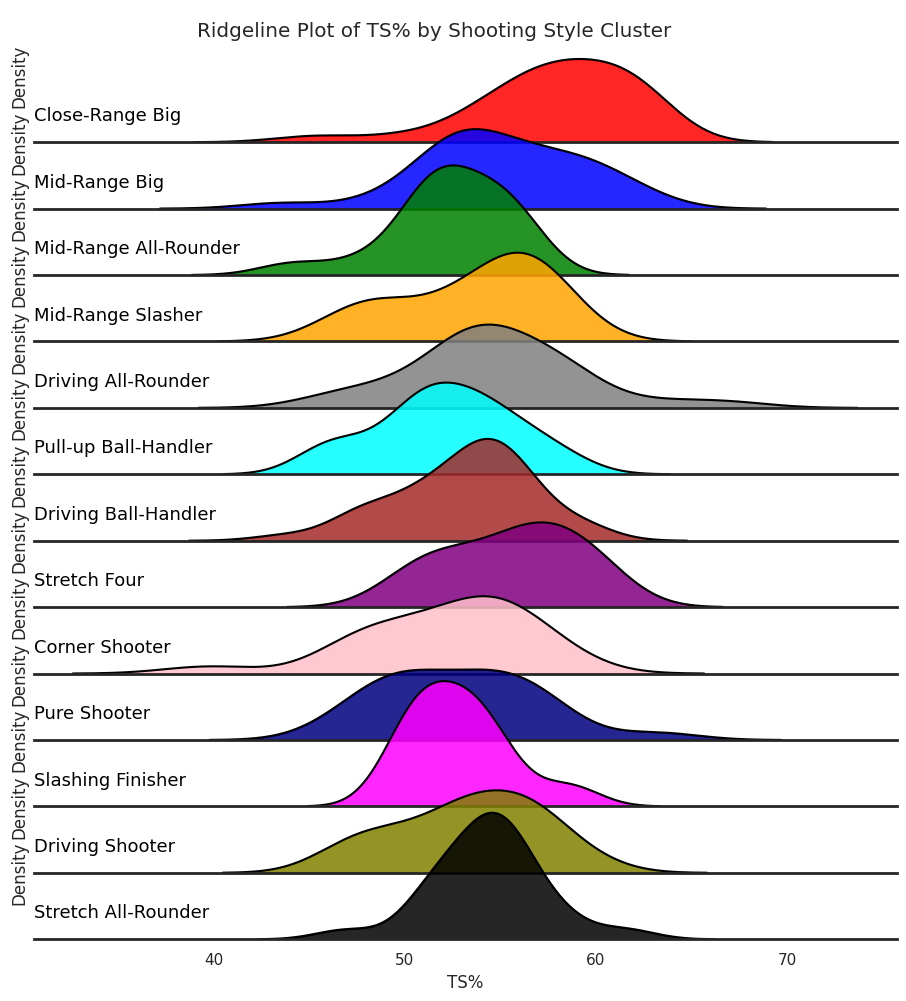

In [55]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 13)
g = sns.FacetGrid(combined_df, palette=colors, row="Cluster Name", hue="Cluster Name", aspect=12, height=0.8)
g.map_dataframe(sns.kdeplot, x="TS%", fill=True, alpha=0.85)
g.map_dataframe(sns.kdeplot, x="TS%", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Cluster Name")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="TS%")
g.despine( left=True)
plt.suptitle('Ridgeline Plot of TS% by Shooting Style Cluster', y=0.95)

In [59]:
player_15_16 = pd.read_csv("../meta_data/2015-16-profile.csv")

In [60]:
for i, h in enumerate(player_15_16["HEIGHT"]):
    feet, inch = h.split("-")
    player_15_16.loc[i, "HEIGHT_CM"] = 30.48*float(feet) + 2.54*float(inch)

In [61]:
player_15_16

,PLAYER,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,...,PTS,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%,HEIGHT_CM
0,Zaza Pachulia,DAL,32,6-11,275,NaN,Georgia,2003,2,42,...,650,718,128,0.1,12.40%,23.70%,16.30%,55.00%,10.10%,210.82
1,Zach Randolph,MEM,34,6-9,260,Michigan State,USA,2001,1,19,...,"1,040.00",529,142,-1.1,8.80%,18.70%,24.70%,51.90%,12.50%,205.74
2,Zach LaVine,MIN,21,6-5,189,UCLA,USA,2014,1,13,...,"1,150.00",228,251,-6.2,1.20%,8.90%,22.80%,54.80%,18.70%,195.58
3,Xavier Munford,MEM,24,6-3,180,Rhode Island,USA,2014,NaN,NaN,...,80,31,22,-5.1,1.10%,12.90%,16.80%,48.10%,13.60%,190.50
4,Willie Reed,BKN,26,6-10,220,St. Louis,USA,2011,0,0,...,182.00,122,10,-7.2,11.30%,17.40%,17.50%,57.90%,3.90%,208.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Al Horford,ATL,30,6-10,245,Florida,Dominican Rep...,2007,1,3,...,"1,249.00",596,263,4.2,5.60%,15.80%,20.20%,56.50%,16.50%,208.28
472,Adreian Payne,MIN,25,6-10,237,Michigan State,USA,2014,1,15,...,132,111,29,-12.0,4.40%,19.80%,17.50%,42.20%,9.30%,208.28
473,Aaron Harrison,CHA,21,6-6,210,Kentucky,USA,Undrafted,Undrafted,Undrafted,...,18.00,15,2,-3.4,4.50%,11.20%,13.20%,37.10%,3.30%,198.12
474,Aaron Gordon,ORL,20,6-9,220,Arizona,USA,2014,1,4,...,719.00,507,128,-1.4,8.00%,18.90%,16.90%,54.10%,10.30%,205.74


In [62]:
player_cluster_df = pd.DataFrame(data= {"PLAYER": player_cluster_dict.keys(), "CLUSTER": player_cluster_dict.values()})

In [63]:
player_cluster_height_df = pd.merge(player_cluster_df, player_15_16, how="left")

In [64]:
for k in range(1,14):
    print(player_cluster_height_df[player_cluster_height_df["CLUSTER"]==k]["HEIGHT_CM"].mean())

210.58909090909088
209.946875
208.8847619047619
206.52153846153848
198.62799999999996
189.865
190.72577777777778
205.1957142857143
198.60846153846154
194.40769230769232
199.04363636363635
201.50666666666663
205.73999999999995
